In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay



In [2]:
df = pd.read_csv("datasets/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
input_cols = [
    'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','Glucose','BMI','DiabetesPedigreeFunction', 'Age'
]
X = df[input_cols] # Features
y = df.Outcome # Target variable

<AxesSubplot:title={'center':'Distribuzione'}, xlabel='Outcome'>

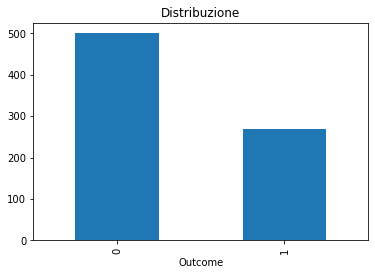

In [5]:
df.pivot_table(index="Outcome", aggfunc="size").plot(kind='bar', title="Distribuzione")

#imbalanced data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [7]:
scaler = MinMaxScaler().fit(X_train)

X_scaled = scaler.transform(X_train)



In [8]:
pipe = make_pipeline(MinMaxScaler(), LogisticRegression())

pipe.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

0.8177083333333334


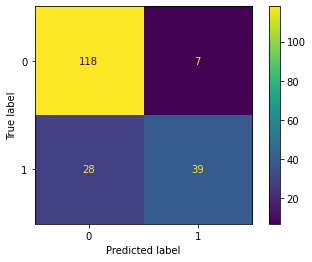

In [9]:
y_pred = pipe.predict(X_test)

print(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

In [10]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(
    random_state=42
)

# fit the model with data
logreg.fit(X_train, y_train)


/Users/giumast/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

0.8177083333333334


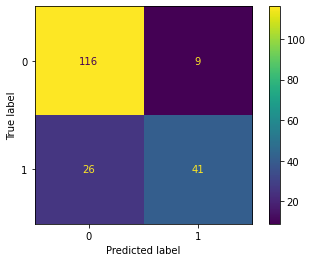

In [11]:
y_pred = logreg.predict(X_test)

print(accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)